In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing date and dropping features uncorrelated with survival outcome

In [53]:
titanic_dataset = pd.read_csv("train.csv")
training_dataset = titanic_dataset.drop(columns=["Ticket", 'Cabin', 'Name', 'PassengerId'])

Droppig passangers with missing values

In [54]:
training_dataset = training_dataset.dropna(subset=["Embarked", "Age"])

The values of Sex, Embarked (port of embarkation) and Cabin are transformed into integeres with the following correspondence:
- Sex:
    - `male` -> `0`
    - `female` -> `1`
- Embarked:
    - `C` -> `0`
    - `Q` -> `1`
    - `S` -> `2`

In [55]:
training_dataset['Sex'] = training_dataset['Sex'].replace(to_replace=["male", "female"], value=[0, 1])
training_dataset['Embarked'] = training_dataset['Embarked'].replace(to_replace=["C", "Q", "S"], value=[0, 1, 2])

Transforming the dataset in numpy arrays to implement the gradient ascent

In [ ]:
data_matrix = training_dataset.drop(columns='Survived').to_numpy()
target_array = training_dataset['Survived'].to_numpy().reshape((-1, 1))

# adding a columns for x0
column_of_ones = np.ones(shape=(data_matrix.shape[0], 1))
data_matrix = np.hstack((column_of_ones, data_matrix))

Defining the gradient ascent functions. \
Ho modificato `log_lik_deriv` per compatibilita dimensionali

In [119]:
def sigmoid(x):
    '''
    Function to compute the sigmoid of a given input x.
    
    Input:
    x: it's the input data matrix. The shape is (N, H)

    Output:
    g: The sigmoid of the input x
    '''
    g=1/(1+np.exp(-x))
    return g

def log_likelihood(theta,features,target):
    '''
    Function to compute the log likehood of theta according to data x and label y
    
    Input:
    theta: it's the model parameter matrix.
    features: it's the input data matrix. The shape is (N, H)
    target: the label array
    
    Output:
    log_g: the log likehood of theta according to data x and label y
    '''
      
    log_l=((target*np.log(sigmoid(features @ theta))+(1-target)*np.log(1-sigmoid(features @ theta))).sum())/len(features)

    return log_l


def predictions(features, theta):
    '''
    Function to compute the predictions for the input features
    
    Input:
    theta: it's the model parameter matrix.
    features: it's the input data matrix. The shape is (N, H)
    
    Output:
    preds: the predictions of the input features
    '''
      
    response=sigmoid(features @ theta)
    preds = np.where(response >=0.5, 1, 0)
    return preds


def update_theta(theta, target, preds, features, lr):
    '''
    Function to compute the gradient of the log likelihood
    and then return the updated weights

    Input:
    theta: the model parameter matrix.
    target: the label array
    preds: the predictions of the input features
    features: it's the input data matrix. The shape is (N, H)
    lr: the learning rate
    
    Output:
    theta: the updated model parameter matrix.
    '''
    
    # (712, 1) @ (712, 8)
    log_lik_deriv=(((target_array - sigmoid(data_matrix @ theta0)).transpose() @ data_matrix) / len(data_matrix)).transpose()
    theta=theta+lr*log_lik_deriv
    return theta 

def gradient_ascent(theta, features, target, lr, num_steps):
    '''
    Function to execute the gradient ascent algorithm

    Input:
    theta: the model parameter matrix.
    target: the label array
    num_steps: the number of iterations 
    features: the input data matrix. The shape is (N, H)
    lr: the learning rate
    
    Output:
    theta: the final model parameter matrix.
    log_likelihood_history: the values of the log likelihood during the process
    '''

    log_likelihood_history = np.zeros(num_steps)
    
    
    for step in range(num_steps):
      
        log_likelihood_history[step]=log_likelihood(theta,features,target)
        preds=predictions(features, theta)
        theta=update_theta(theta, target, preds, features, lr)
    
    return theta, log_likelihood_history


Implementing the method

In [124]:
# Initialize theta0
theta0 = np.zeros((data_matrix.shape[1], 1))

# Run Gradient Ascent method
n_iter=1000
theta_final, log_l_history = gradient_ascent(theta0, data_matrix, target_array, lr=0.05 , num_steps=n_iter)
print(theta_final)


[[-4.77528090e+00]
 [-1.80126404e+01]
 [ 4.59971910e+00]
 [-1.70850772e+02]
 [-2.80898876e+00]
 [-7.02247191e-02]
 [ 1.80378371e+02]
 [-1.10955056e+01]]


/tmp/ipykernel_1498/3824970667.py:27: RuntimeWarning: divide by zero encountered in log
  log_l=((target*np.log(sigmoid(features @ theta))+(1-target)*np.log(1-sigmoid(features @ theta))).sum())/len(features)
/tmp/ipykernel_1498/3824970667.py:27: RuntimeWarning: invalid value encountered in multiply
  log_l=((target*np.log(sigmoid(features @ theta))+(1-target)*np.log(1-sigmoid(features @ theta))).sum())/len(features)
/tmp/ipykernel_1498/3824970667.py:11: RuntimeWarning: overflow encountered in exp
  g=1/(1+np.exp(-x))


Let's plot the log likelihood over iterations


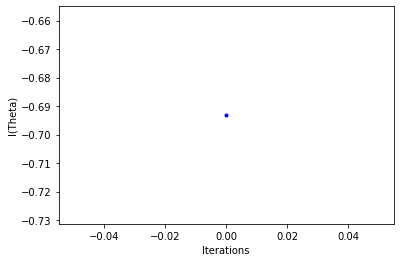

In [125]:
fig,ax = plt.subplots(num=2)

ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history)),log_l_history,'b.')